# Feature Engineering

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

## Загрузка данных

In [2]:
home_data = pd.read_csv("./../../../data/hpc_train.csv")
home_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
train_data = pd.DataFrame()
train_data['SalePrice'] = home_data['SalePrice'].copy()

## Вспомогательные функции

In [4]:
def print_value_counts_unique(column):
    print(f"{'-' * 10}\n\nunique:\n{column.unique()}\n")
    print(f"{'-' * 10}\n\nvalue_counts:\n{column.value_counts()}\n")

In [5]:
def get_column_print_info(column_name: str):
    column = home_data[column_name].copy()
    print(f"{'-' * 10}\n\ncolumn_name: {column_name}\n")
    print_value_counts_unique(column)
    column.hist()
    return column

In [6]:
def fillna_print_info(column, new_val):
    column.fillna(new_val, inplace=True)
    print_value_counts_unique(column)
    column.hist()

In [7]:
def add_to_train_print(data, column):
    data[column_name] = column
    
    print('data:')
    display(data)

In [8]:
def get_dummies_add_to_train_print(data, column, column_name):
    dummies = pd.get_dummies(column, prefix=column_name)
    
    print('dummies:')
    display(dummies)
    
    data = data.join(dummies)
    print('data:')
    display(data)

In [9]:
def ordered_mapping_add_to_train_print(data, column, column_name, label_mapping):
    column = column.replace(label_mapping)
    
    column.hist()
    
    print('mapped column:')
    display(column)
    
    data[column_name] = column
    print('data:')
    display(data)

## Обработка колонки `LotFrontage`

```
LotFrontage: Linear feet of street connected to property
```

Можно попробовать заменить пустые значения на 0 (предположу, что отсутствие значения значит отсутствие соединения с улицей).

----------

column_name: LotFrontage

----------

unique:
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

----------

value_counts:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64



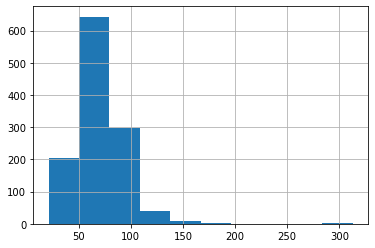

In [10]:
column_name = 'LotFrontage'
current_column = get_column_print_info(column_name)

----------

unique:
[ 65.  80.  68.  60.  84.  85.  75.   0.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

----------

value_counts:
0.0      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64



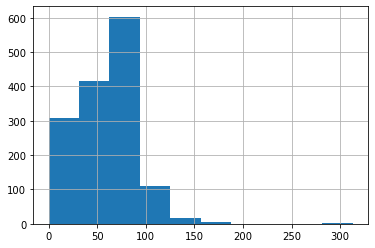

In [11]:
fillna_print_info(current_column, 0.0)

In [12]:
add_to_train_print(train_data, current_column)

data:


,SalePrice,LotFrontage
0,208500,65.0
1,181500,80.0
2,223500,68.0
3,140000,60.0
4,250000,84.0
...,...,...
1455,175000,62.0
1456,210000,85.0
1457,266500,66.0
1458,142125,68.0


## Обработка колонки `Alley`

```
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
```

Можно заменить `NA` на `"Empty"`, а затем использовать `Dummy`.

----------

column_name: Alley

----------

unique:
[nan 'Grvl' 'Pave']

----------

value_counts:
Grvl    50
Pave    41
Name: Alley, dtype: int64



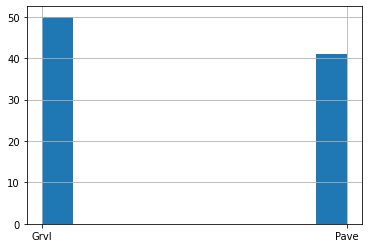

In [13]:
column_name = 'Alley'
current_column = get_column_print_info(column_name)

----------

unique:
['Empty' 'Grvl' 'Pave']

----------

value_counts:
Empty    1369
Grvl       50
Pave       41
Name: Alley, dtype: int64



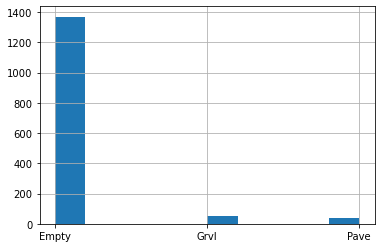

In [14]:
fillna_print_info(current_column, 'Empty')

In [15]:
get_dummies_add_to_train_print(train_data, current_column, column_name)

dummies:


,Alley_Empty,Alley_Grvl,Alley_Pave
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1455,1,0,0
1456,1,0,0
1457,1,0,0
1458,1,0,0


data:


,SalePrice,LotFrontage,Alley_Empty,Alley_Grvl,Alley_Pave
0,208500,65.0,1,0,0
1,181500,80.0,1,0,0
2,223500,68.0,1,0,0
3,140000,60.0,1,0,0
4,250000,84.0,1,0,0
...,...,...,...,...,...
1455,175000,62.0,1,0,0
1456,210000,85.0,1,0,0
1457,266500,66.0,1,0,0
1458,142125,68.0,1,0,0


## Обработка колонки `MasVnrType`

```
MasVnrType: Masonry veneer type

       BrkCmn   Brick Common
       BrkFace  Brick Face
       CBlock   Cinder Block
       None     None
       Stone    Stone
```

Заменю все недостающие значения на тип `None`. Хотя, возможно, там было что-то другое, но так как пустых значений довольно много, то это не должно очень сильно повлиять.

А затем ипользовать `Dummy`.

TODO: Подумать над более логичной заменой пустых значений.

----------

column_name: MasVnrType

----------

unique:
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]

----------

value_counts:
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64



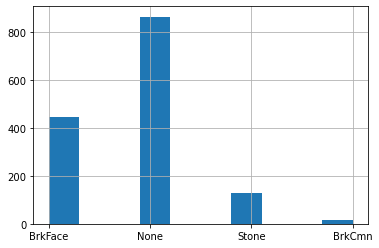

In [16]:
column_name = 'MasVnrType'
current_column = get_column_print_info(column_name)

----------

unique:
['BrkFace' 'None' 'Stone' 'BrkCmn']

----------

value_counts:
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64



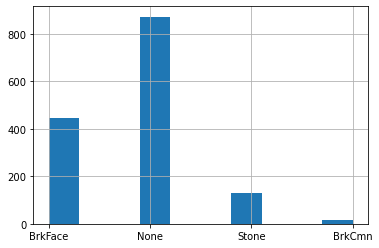

In [17]:
fillna_print_info(current_column, 'None')

In [18]:
get_dummies_add_to_train_print(train_data, current_column, column_name)

dummies:


,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,0,1
1457,0,0,1,0
1458,0,0,1,0


data:


,SalePrice,LotFrontage,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,208500,65.0,0,1,0,0
1,181500,80.0,0,0,1,0
2,223500,68.0,0,1,0,0
3,140000,60.0,0,0,1,0
4,250000,84.0,0,1,0,0
...,...,...,...,...,...,...
1455,175000,62.0,0,0,1,0
1456,210000,85.0,0,0,0,1
1457,266500,66.0,0,0,1,0
1458,142125,68.0,0,0,1,0


## Обработка колонки `MasVnrArea`

```
MasVnrArea: Masonry veneer area in square feet
```

Заменю все недостающие значения на `0.0`. Хотя, возможно, там было что-то другое, но так как пустых значений довольно много, то это не должно очень сильно повлиять.


TODO: Подумать над более логичной заменой пустых значений. Судя по всему отсутствующие значения одновременно отсутствуют и в`MasVnrType` и в `MasVnrArea`.

----------

column_name: MasVnrArea

----------

unique:
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02

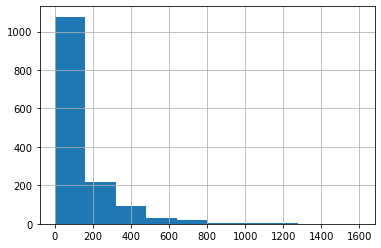

In [19]:
column_name = 'MasVnrArea'
current_column = get_column_print_info(column_name)

----------

unique:
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02 6.040e+02 2.540e+02 3.600e+01
 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.720e

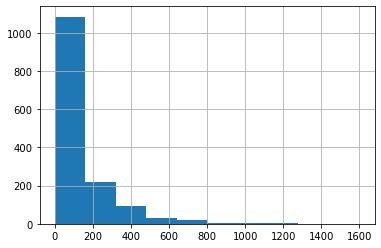

In [20]:
fillna_print_info(current_column, 0.0)

In [21]:
train_data[column_name] = current_column
train_data

,SalePrice,LotFrontage,MasVnrArea
0,208500,65.0,196.0
1,181500,80.0,0.0
2,223500,68.0,162.0
3,140000,60.0,0.0
4,250000,84.0,350.0
...,...,...,...
1455,175000,62.0,0.0
1456,210000,85.0,119.0
1457,266500,66.0,0.0
1458,142125,68.0,0.0


## Обработка колонки `BsmtQual`
```
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.
Допустим, что No Basement = минимальный.

----------

column_name: BsmtQual

----------

unique:
['Gd' 'TA' 'Ex' nan 'Fa']

----------

value_counts:
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64



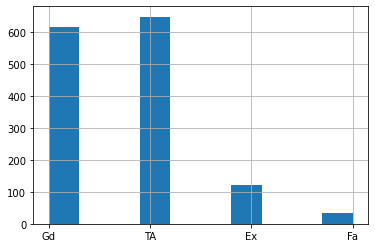

In [22]:
column_name = 'BsmtQual'
current_column = get_column_print_info(column_name)

----------

unique:
['Gd' 'TA' 'Ex' 'NA' 'Fa']

----------

value_counts:
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64



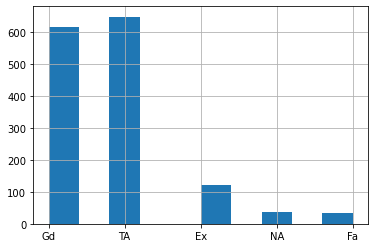

In [23]:
fillna_print_info(current_column, 'NA')

mapped column:


0       4
1       4
2       4
3       3
4       4
       ..
1455    4
1456    4
1457    3
1458    3
1459    3
Name: BsmtQual, Length: 1460, dtype: int64

data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual
0,208500,65.0,196.0,4
1,181500,80.0,0.0,4
2,223500,68.0,162.0,4
3,140000,60.0,0.0,3
4,250000,84.0,350.0,4
...,...,...,...,...
1455,175000,62.0,0.0,4
1456,210000,85.0,119.0,4
1457,266500,66.0,0.0,3
1458,142125,68.0,0.0,3


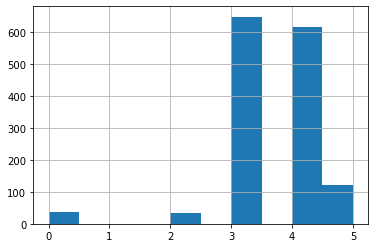

In [24]:
label_mapping_ex_gd_ta_fa_po_no = {'Ex':5, 
                                   'Gd': 4, 
                                   'TA': 3 , 
                                   'Fa': 2, 
                                   'Po': 1, 
                                   'NA': 0}

ordered_mapping_add_to_train_print(train_data, 
                                   current_column, 
                                   column_name, 
                                   label_mapping_ex_gd_ta_fa_po_no)

## Обработка колонки `BsmtCond`

```
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.
Допустим, что No Basement = минимальный.

----------

column_name: BsmtCond

----------

unique:
['TA' 'Gd' nan 'Fa' 'Po']

----------

value_counts:
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64



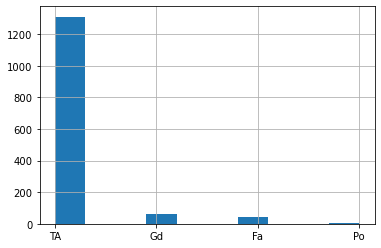

In [25]:
column_name = 'BsmtCond'
current_column = get_column_print_info(column_name)

----------

unique:
['TA' 'Gd' 'NA' 'Fa' 'Po']

----------

value_counts:
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64



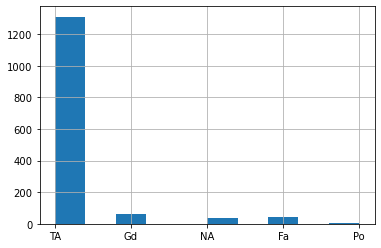

In [26]:
fillna_print_info(current_column, 'NA')

mapped column:


0       3
1       3
2       3
3       4
4       3
       ..
1455    3
1456    3
1457    4
1458    3
1459    3
Name: BsmtCond, Length: 1460, dtype: int64

data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond
0,208500,65.0,196.0,4,3
1,181500,80.0,0.0,4,3
2,223500,68.0,162.0,4,3
3,140000,60.0,0.0,3,4
4,250000,84.0,350.0,4,3
...,...,...,...,...,...
1455,175000,62.0,0.0,4,3
1456,210000,85.0,119.0,4,3
1457,266500,66.0,0.0,3,4
1458,142125,68.0,0.0,3,3


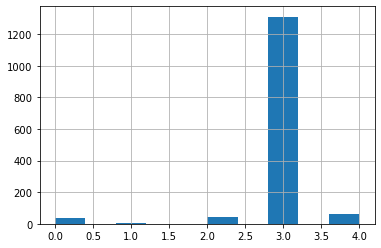

In [27]:
ordered_mapping_add_to_train_print(train_data, 
                                   current_column, 
                                   column_name, 
                                   label_mapping_ex_gd_ta_fa_po_no)

## Обработка колонки `BsmtExposure`
```
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.

----------

column_name: BsmtExposure

----------

unique:
['No' 'Gd' 'Mn' 'Av' nan]

----------

value_counts:
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64



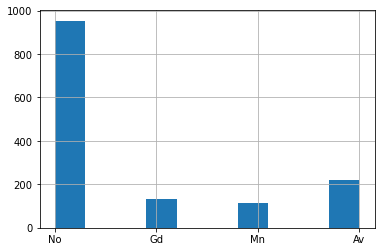

In [28]:
column_name = 'BsmtExposure'
current_column = get_column_print_info(column_name)

----------

unique:
['No' 'Gd' 'Mn' 'Av' 'NA']

----------

value_counts:
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64



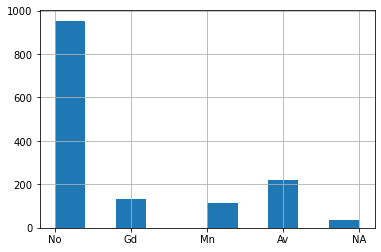

In [29]:
fillna_print_info(current_column, 'NA')

mapped column:


0       1
1       4
2       2
3       1
4       3
       ..
1455    1
1456    1
1457    1
1458    2
1459    1
Name: BsmtExposure, Length: 1460, dtype: int64

data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure
0,208500,65.0,196.0,4,3,1
1,181500,80.0,0.0,4,3,4
2,223500,68.0,162.0,4,3,2
3,140000,60.0,0.0,3,4,1
4,250000,84.0,350.0,4,3,3
...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1
1456,210000,85.0,119.0,4,3,1
1457,266500,66.0,0.0,3,4,1
1458,142125,68.0,0.0,3,3,2


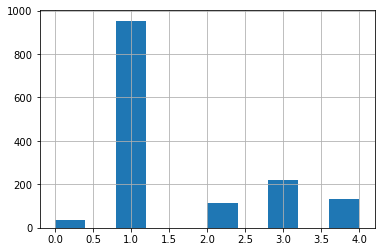

In [30]:
label_mapping_gd_av_mn_no_na = {'Gd': 4, 
                                'Av': 3 , 
                                'Mn': 2, 
                                'No': 1, 
                                'NA': 0}

ordered_mapping_add_to_train_print(train_data, 
                                   current_column, 
                                   column_name, 
                                   label_mapping_gd_av_mn_no_na)

## Обработка колонки `BsmtFinType1`
```
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.

----------

column_name: BsmtFinType1

----------

unique:
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

----------

value_counts:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64



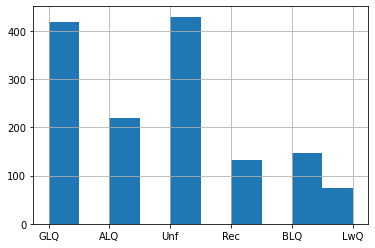

In [31]:
column_name = 'BsmtFinType1'
current_column = get_column_print_info(column_name)

----------

unique:
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']

----------

value_counts:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64



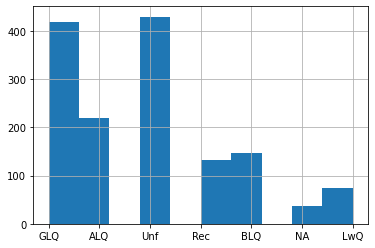

In [32]:
fillna_print_info(current_column, 'NA')

mapped column:


0       6
1       5
2       6
3       5
4       6
       ..
1455    1
1456    5
1457    6
1458    6
1459    4
Name: BsmtFinType1, Length: 1460, dtype: int64

data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1
0,208500,65.0,196.0,4,3,1,6
1,181500,80.0,0.0,4,3,4,5
2,223500,68.0,162.0,4,3,2,6
3,140000,60.0,0.0,3,4,1,5
4,250000,84.0,350.0,4,3,3,6
...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1
1456,210000,85.0,119.0,4,3,1,5
1457,266500,66.0,0.0,3,4,1,6
1458,142125,68.0,0.0,3,3,2,6


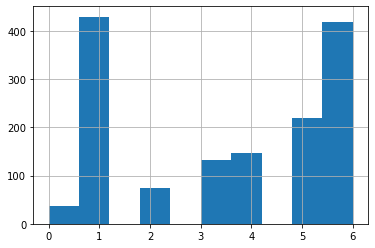

In [33]:
label_mapping_glq_alq_blq_rec_lwq_unf_na  = {'GLQ': 6,
                                             'ALQ': 5, 
                                             'BLQ': 4, 
                                             'Rec': 3 , 
                                             'LwQ': 2, 
                                             'Unf': 1, 
                                             'NA': 0}

ordered_mapping_add_to_train_print(train_data, 
                                   current_column, 
                                   column_name, 
                                   label_mapping_glq_alq_blq_rec_lwq_unf_na)

## Обработка колонки `BsmtFinType2`
```
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
```

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

Так как это порядковые пременные, то можно применить `LabelEncoder`.

----------

column_name: BsmtFinType2

----------

unique:
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

----------

value_counts:
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64



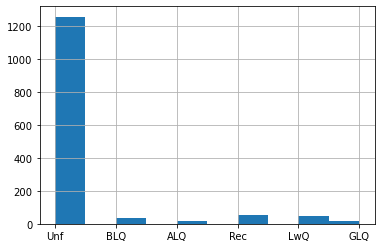

In [34]:
column_name = 'BsmtFinType2'
current_column = get_column_print_info(column_name)

----------

unique:
['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']

----------

value_counts:
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64



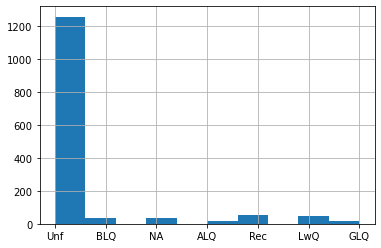

In [35]:
fillna_print_info(current_column, 'NA')

mapped column:


0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    3
1457    1
1458    3
1459    2
Name: BsmtFinType2, Length: 1460, dtype: int64

data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,208500,65.0,196.0,4,3,1,6,1
1,181500,80.0,0.0,4,3,4,5,1
2,223500,68.0,162.0,4,3,2,6,1
3,140000,60.0,0.0,3,4,1,5,1
4,250000,84.0,350.0,4,3,3,6,1
...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1
1456,210000,85.0,119.0,4,3,1,5,3
1457,266500,66.0,0.0,3,4,1,6,1
1458,142125,68.0,0.0,3,3,2,6,3


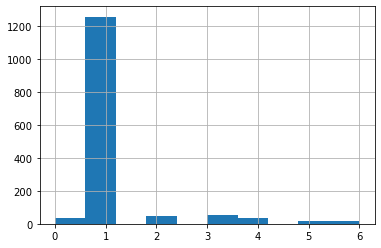

In [36]:
ordered_mapping_add_to_train_print(train_data, 
                                   current_column, 
                                   column_name, 
                                   label_mapping_glq_alq_blq_rec_lwq_unf_na)

## Обработка колонки `Electrical`
```
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
```

Так как тут всего 1 значение `nan`, то заменю его на самое распространенное.

И так как это порядковое значение, то можно использовать `mapping`. 

Так как значение `Mix` встречается всего 1 раз, то буду считать его худшим (самое непопулярное по крайней мере).

----------

column_name: Electrical

----------

unique:
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

----------

value_counts:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64



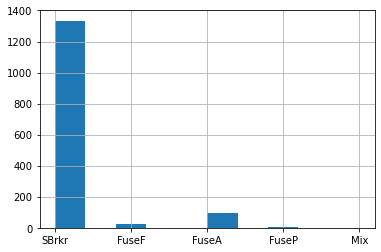

In [37]:
column_name = 'Electrical'
current_column = get_column_print_info(column_name)

----------

unique:
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']

----------

value_counts:
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64



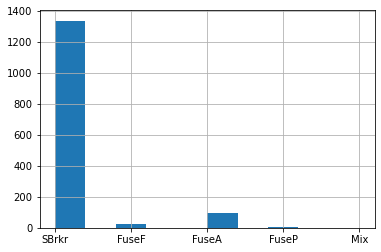

In [38]:
fillna_print_info(current_column, 'SBrkr')

mapped column:


0       4
1       4
2       4
3       4
4       4
       ..
1455    4
1456    4
1457    4
1458    3
1459    4
Name: Electrical, Length: 1460, dtype: int64

data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical
0,208500,65.0,196.0,4,3,1,6,1,4
1,181500,80.0,0.0,4,3,4,5,1,4
2,223500,68.0,162.0,4,3,2,6,1,4
3,140000,60.0,0.0,3,4,1,5,1,4
4,250000,84.0,350.0,4,3,3,6,1,4
...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1,4
1456,210000,85.0,119.0,4,3,1,5,3,4
1457,266500,66.0,0.0,3,4,1,6,1,4
1458,142125,68.0,0.0,3,3,2,6,3,3


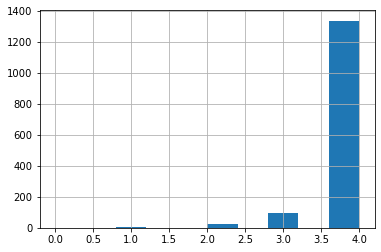

In [39]:
label_electrical = {'SBrkr':4, 'FuseA':3 , 'FuseF': 2, 'FuseP': 1, 'Mix': 0}
ordered_mapping_add_to_train_print(train_data, 
                                   current_column, 
                                   column_name, 
                                   label_electrical)

## Обработка колонки `FireplaceQu`
```
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
```

И так как это порядковое значение, то можно использовать `mapping`. 

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

TODO: Без камина лучше, чем плохой камин?

----------

column_name: FireplaceQu

----------

unique:
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

----------

value_counts:
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64



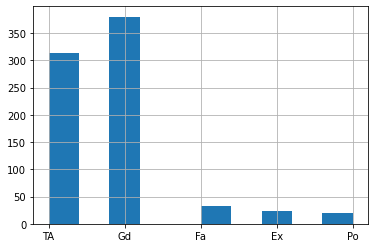

In [40]:
column_name = 'FireplaceQu'
current_column = get_column_print_info(column_name)

----------

unique:
['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']

----------

value_counts:
NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64



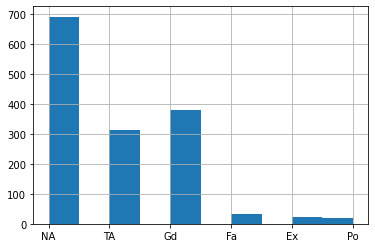

In [41]:
fillna_print_info(current_column, 'NA')

mapped column:


0       0
1       3
2       3
3       4
4       3
       ..
1455    3
1456    3
1457    4
1458    0
1459    0
Name: FireplaceQu, Length: 1460, dtype: int64

data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu
0,208500,65.0,196.0,4,3,1,6,1,4,0
1,181500,80.0,0.0,4,3,4,5,1,4,3
2,223500,68.0,162.0,4,3,2,6,1,4,3
3,140000,60.0,0.0,3,4,1,5,1,4,4
4,250000,84.0,350.0,4,3,3,6,1,4,3
...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1,4,3
1456,210000,85.0,119.0,4,3,1,5,3,4,3
1457,266500,66.0,0.0,3,4,1,6,1,4,4
1458,142125,68.0,0.0,3,3,2,6,3,3,0


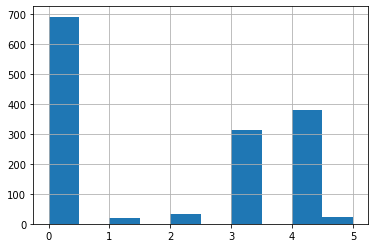

In [42]:
ordered_mapping_add_to_train_print(train_data, 
                                   current_column, 
                                   column_name, 
                                   label_mapping_ex_gd_ta_fa_po_no)

## Обработка колонки `GarageType`
```
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
```

Это номинальные значения, можно использовать `Dummy`.

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

TODO: Может быть на самом деле это порядковые? Что-то из этого лучше другого однозначно? Понятно, что больше 1 гаража точно лучше, чем без него, но остальные под вопросом.

----------

column_name: GarageType

----------

unique:
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

----------

value_counts:
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64



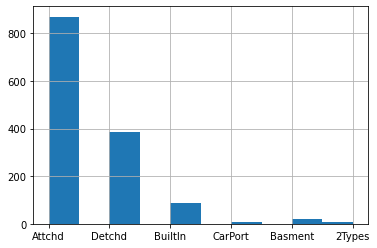

In [43]:
column_name = 'GarageType'
current_column = get_column_print_info(column_name)

----------

unique:
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NA' 'Basment' '2Types']

----------

value_counts:
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64



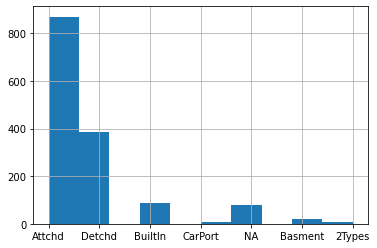

In [44]:
fillna_print_info(current_column, 'NA')

In [45]:
get_dummies_add_to_train_print(train_data, current_column, column_name)

dummies:


,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
1455,0,1,0,0,0,0,0
1456,0,1,0,0,0,0,0
1457,0,1,0,0,0,0,0
1458,0,1,0,0,0,0,0


data:


,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,208500,65.0,196.0,4,3,1,6,1,4,0,0,1,0,0,0,0,0
1,181500,80.0,0.0,4,3,4,5,1,4,3,0,1,0,0,0,0,0
2,223500,68.0,162.0,4,3,2,6,1,4,3,0,1,0,0,0,0,0
3,140000,60.0,0.0,3,4,1,5,1,4,4,0,0,0,0,0,1,0
4,250000,84.0,350.0,4,3,3,6,1,4,3,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1,4,3,0,1,0,0,0,0,0
1456,210000,85.0,119.0,4,3,1,5,3,4,3,0,1,0,0,0,0,0
1457,266500,66.0,0.0,3,4,1,6,1,4,4,0,1,0,0,0,0,0
1458,142125,68.0,0.0,3,3,2,6,3,3,0,0,1,0,0,0,0,0


## Обработка колонки `GarageYrBlt`
```
GarageYrBlt: Year garage was built
```

Сейчас попробую обозначить отсутствующие значения `0.0`.

TODO: Года постройки гаража нет там, где нет самого гаража и это логично. Но как это правильно обозначить?

----------

column_name: GarageYrBlt

----------

unique:
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]

----------

value_counts:
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64



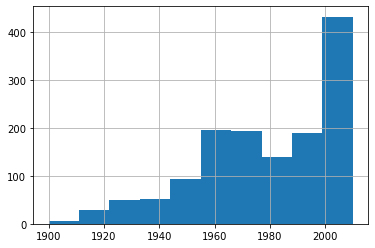

In [46]:
column_name = 'GarageYrBlt'
current_column = get_column_print_info(column_name)

----------

unique:
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.    0. 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]

----------

value_counts:
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1927.0     1
1900.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64



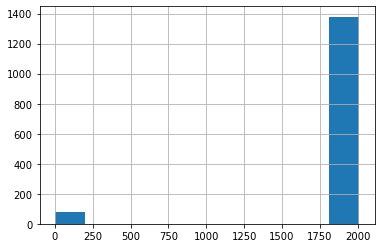

In [47]:
fillna_print_info(current_column, 0.0)

In [48]:
train_data[column_name] = current_column
train_data

,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt
0,208500,65.0,196.0,4,3,1,6,1,4,0,2003.0
1,181500,80.0,0.0,4,3,4,5,1,4,3,1976.0
2,223500,68.0,162.0,4,3,2,6,1,4,3,2001.0
3,140000,60.0,0.0,3,4,1,5,1,4,4,1998.0
4,250000,84.0,350.0,4,3,3,6,1,4,3,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1,4,3,1999.0
1456,210000,85.0,119.0,4,3,1,5,3,4,3,1978.0
1457,266500,66.0,0.0,3,4,1,6,1,4,4,1941.0
1458,142125,68.0,0.0,3,3,2,6,3,3,0,1950.0


## Обработка колонки `GarageFinish`
```
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
```

И так как это порядковое значение, то можно использовать `mapping`. 

Заменю все `nan` значения на `NA`, так как уже в документации так и указано.

----------

column_name: GarageFinish

----------

unique:
['RFn' 'Unf' 'Fin' nan]

----------

value_counts:
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64



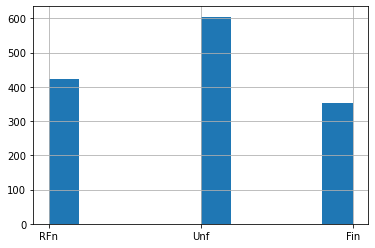

In [49]:
column_name = 'GarageFinish'
current_column = get_column_print_info(column_name)

----------

unique:
['RFn' 'Unf' 'Fin' 'NA']

----------

value_counts:
Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64



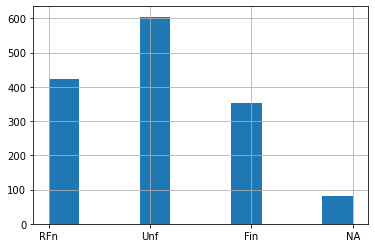

In [50]:
fillna_print_info(current_column, 'NA')

In [51]:
label_mapping_fin_rfn_unf_na = {'Fin': 3, 
                                'RFn': 2, 
                                'Unf': 1, 
                                'NA': 0}

current_column = current_column.replace(label_mapping_fin_rfn_unf_na)
current_column
train_data[column_name] = current_column
train_data

,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt,GarageFinish
0,208500,65.0,196.0,4,3,1,6,1,4,0,2003.0,2
1,181500,80.0,0.0,4,3,4,5,1,4,3,1976.0,2
2,223500,68.0,162.0,4,3,2,6,1,4,3,2001.0,2
3,140000,60.0,0.0,3,4,1,5,1,4,4,1998.0,1
4,250000,84.0,350.0,4,3,3,6,1,4,3,2000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1,4,3,1999.0,2
1456,210000,85.0,119.0,4,3,1,5,3,4,3,1978.0,1
1457,266500,66.0,0.0,3,4,1,6,1,4,4,1941.0,2
1458,142125,68.0,0.0,3,3,2,6,3,3,0,1950.0,1


In [52]:
train_data[column_name] = current_column
train_data

,SalePrice,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageYrBlt,GarageFinish
0,208500,65.0,196.0,4,3,1,6,1,4,0,2003.0,2
1,181500,80.0,0.0,4,3,4,5,1,4,3,1976.0,2
2,223500,68.0,162.0,4,3,2,6,1,4,3,2001.0,2
3,140000,60.0,0.0,3,4,1,5,1,4,4,1998.0,1
4,250000,84.0,350.0,4,3,3,6,1,4,3,2000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,0.0,4,3,1,1,1,4,3,1999.0,2
1456,210000,85.0,119.0,4,3,1,5,3,4,3,1978.0,1
1457,266500,66.0,0.0,3,4,1,6,1,4,4,1941.0,2
1458,142125,68.0,0.0,3,3,2,6,3,3,0,1950.0,1


In [53]:
train_data.to_csv("./hpc_train_data.csv")